<a href="https://colab.research.google.com/github/ColZoel/Templates_Tutorials/blob/main/OpenCV_Tutorial_BYU_RLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV intrudction and Tutorial
## With Applications for OCR

Acompanies powerpoint presentation . 

This is a Tutorial to introduce you to how we use OpenCV with specific applications in image preprocessing. Please note that my experience in OCR, so we will use preprocessing for OCR applications. The principles are generally applicable to HWR models as well. 


Read the official [docs here](https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html) and [here](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga103fcbda2f540f3ef1c042d6a9b35ac7).

**Other helpful supplementary resources:**
- [Text Detection](https://youtu.be/wAJY8hTMoRk?t=138) tutorial and overview (project 6)
- Text detection tutorial [(full length)](https://www.youtube.com/watch?v=6DjFscX4I_c) 
- [Image Processing](https://www.youtube.com/watch?v=qCR2Weh64h4) using OpenCV 

- Other [Colab Notebook](https://colab.research.google.com/github/hukim1112/DLCV_UOS/blob/master/lecture5/2.Image_processing.ipynb#scrollTo=0WKlKYEGT2qL) that demonstrates other uses of OpenCV.

*****
*Prepared by Collin Zoeller, Brigham Young University*

August 2022



#1. Basic Functions 

We will start with [this image](https://drive.google.com/file/d/14ZMZoTO4R6Xfp0DhTn4vzhjGa2nHIqH9/view?usp=sharing) of a page from *The Great Gatsby*, which just entered the public domain. 

(image source: http://www.mtgothictomes.com/f_scott_fitzgerald_page_26.htm)

Upload this image in the files menu to continue. 

In [74]:
import cv2
from google.colab.patches import cv2_imshow # for colab support
path = '/content/Great_Gatsby_1st_3rd_dj_10.jpg'
cvgg = cv2.imread(path) # read the image 


The following are awesome functions that don't work in colab. You will need to download this file as .py and fun it in an IDE to see how these work.

Running them in Colab will crash the server. 

In [ ]:
# sets up (does not display) a window called "Great Gatsby"
cv2.namedWindow('Great Gatsby', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Great Gatsby', window_size=(600, 1000))
cv2.imshow("Great Gatsby", cvgg) # displays the image

# create a varible saying how many miliseconds to keep the window open, 
#0 = infinity, after time elapses or a key is pressed if =0, window closes
wait=0
cv2.waitKey(wait)


We can only show the image in Colab, none of the fancy stuff. This is the Colab fix-- it will be different in an IDE


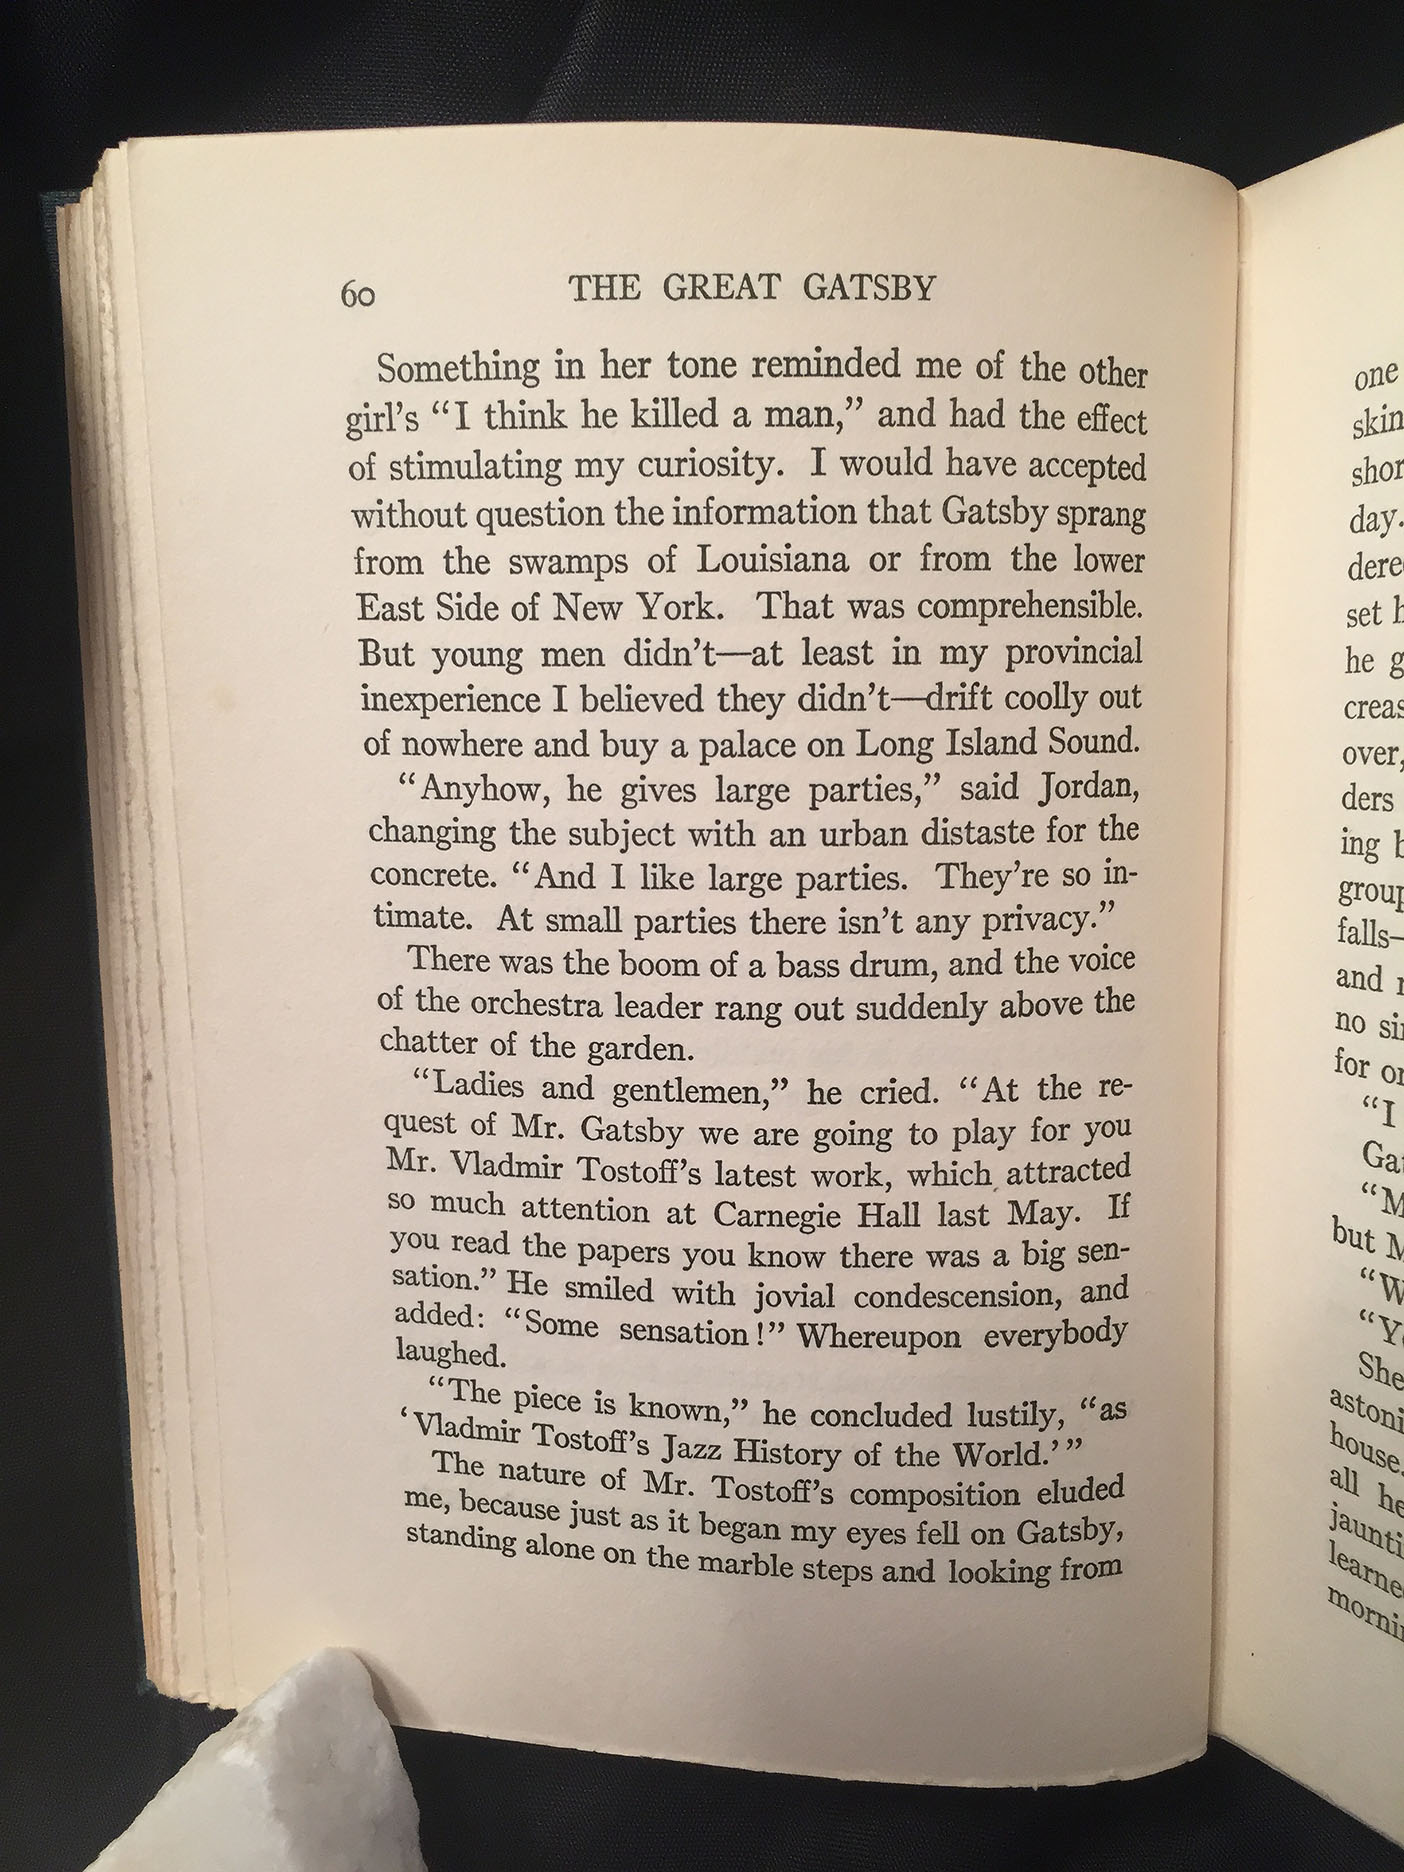

In [2]:
cv2_imshow(cvgg) # displays the image

We will use a work-around to resize the images for Colab, in an IDE this is better done in OpenCV

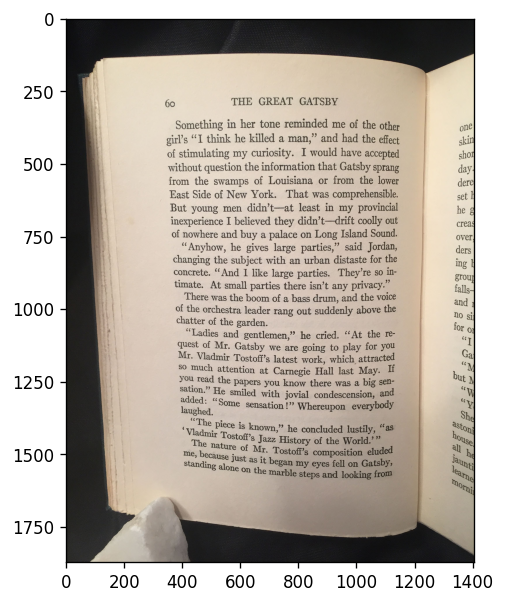

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

gg = plt.imread(path)

def display(img):
    plt.figure(figsize=(8, 6), dpi=120)
    plt.imshow(img)

display(gg)

## Visual/Color Transformations

We can perform a variety of color transformations. In normal settings, we will not use Matplotlib. It is used here for demonstration purposes. The middle image appears this way because of Matplotlib's mapping, but in normal settings would display a gray image like the third one. 


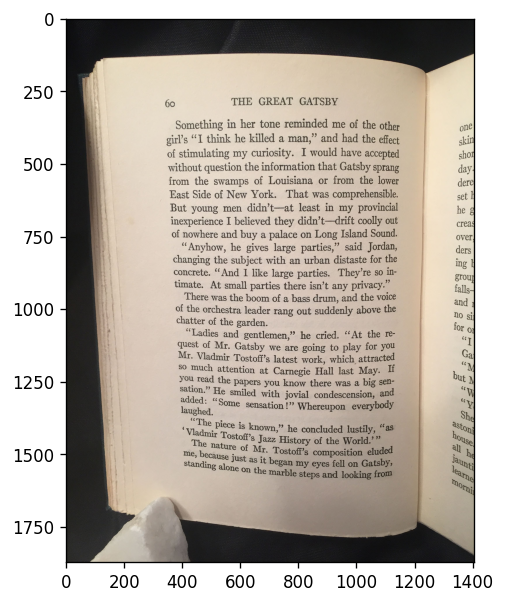

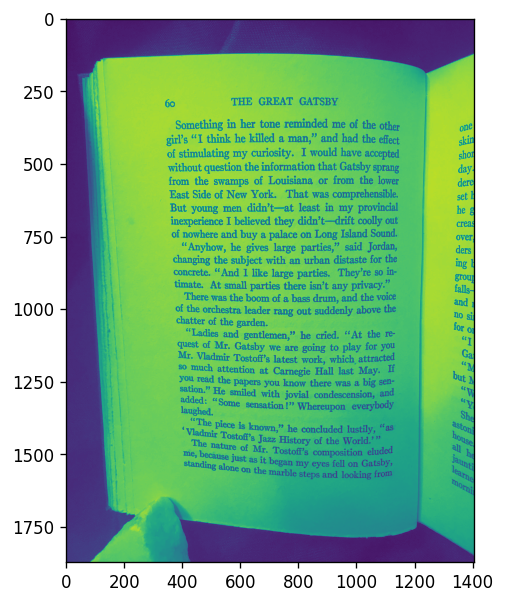

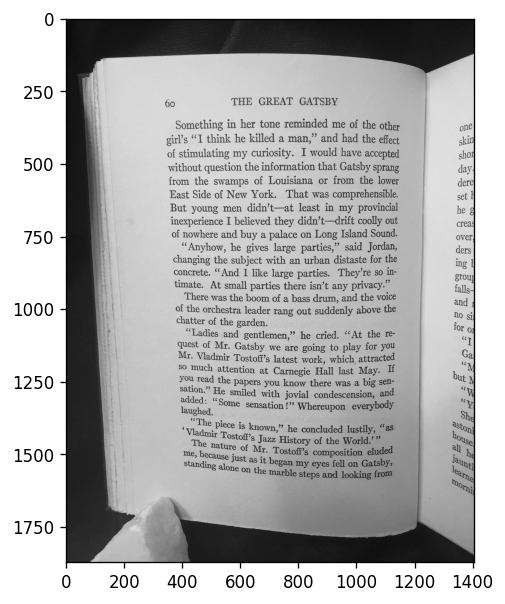

In [3]:
reset = cv2.cvtColor(cvgg, cv2.COLOR_RGB2BGR)
display(reset)
gray = cv2.cvtColor(reset, cv2.COLOR_BGR2GRAY)

def display_g(img):
  plt.figure(figsize=(8, 6), dpi=120)
  plt.imshow(img, cmap="gray", vmin=0, vmax=255) #necessary to see gray in Colab

display(gray)
display_g(gray)

### Blurs

Feel free to play around with the parameters here and see how adjusting each parameter changes image. You can even try extremes like (1000,1000), (1000,1), (1,1000) and so on. a value of (1,1) just returns the original image (it is transforming by the identity). 0 on either axis is undefined.  

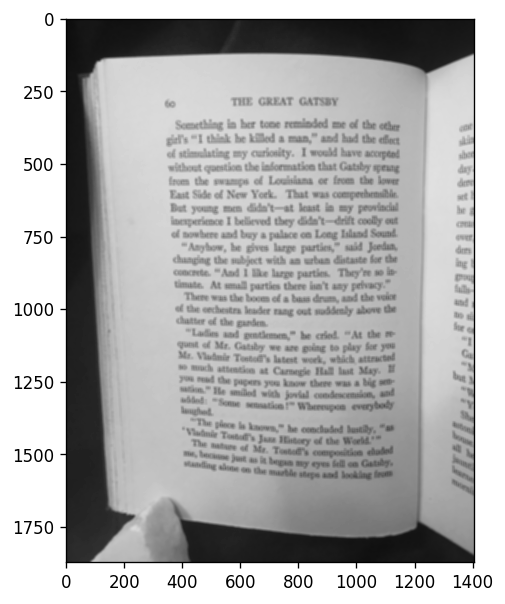

In [7]:
x_blur_size = 10
y_blur_size = 10
blur = cv2.blur(gray, (x_blur_size, y_blur_size))
display_g(blur)

Blurring the image is actually good practice for preprocessing becauseit is hard for stray marks to be retained, yet still gives a general idea about where the text is located. This is important for the next step. 

###Thresholds

A threshold image in OpenCV is a binary, white-on-black image and is the 'engine' for most functions, especially the functions we will be using. 

0 and 255 here represent black and white on the RGB scale. The other parameters are not really necessary to know right now; they'll pretty much be the same every time you will need to call this function. 'Blur' calls the blurred image, but we don't necessarily *need* to put the blurred image through. It however must be a gray image. 

For instance, let's use the original image. 

In [8]:
thresh = cv2.threshold(cvgg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
display(thresh)

error: ignored

You recieved an error saying it is the wrong image type.

Let's try the gray image. 

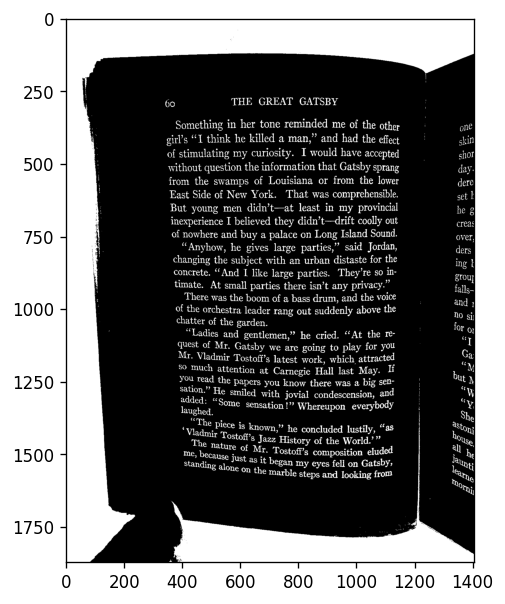

In [9]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
display_g(thresh)

Let's say that the blur is (10,10), how would that look different? Try playing around with other blurring parameters.

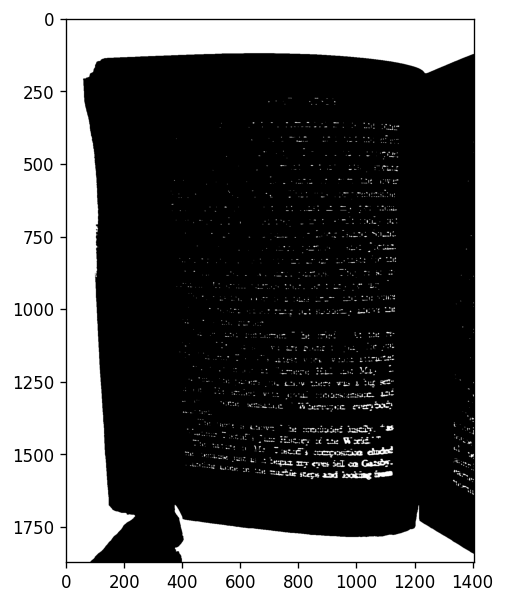

In [13]:
blur = cv2.blur(gray, (10,5))
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
display_g(thresh)

With the right parameters, we can effectively remove any defects, stray marks, etc. from the image that would otherwise show up here. We'll see an example of that later. 

### Dilation

Conceptually, the threshold identifies 'objects' on the black canvas. These objects are called contours. Notice that the white space surrounding the book is large and connected. We can take advantage of that.  

Let's say we don't blur anything out (the image is actually really clean so this would probably be the best anyway). We can either use the Grayed image or set our parameters to (1,1)

In [15]:
blur = cv2.blur(gray, (1,1))
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

We can **dilate** (embolden or excessively fatten) the contours along an axis. Dilation parameters follow the same syntax as blur parameters.

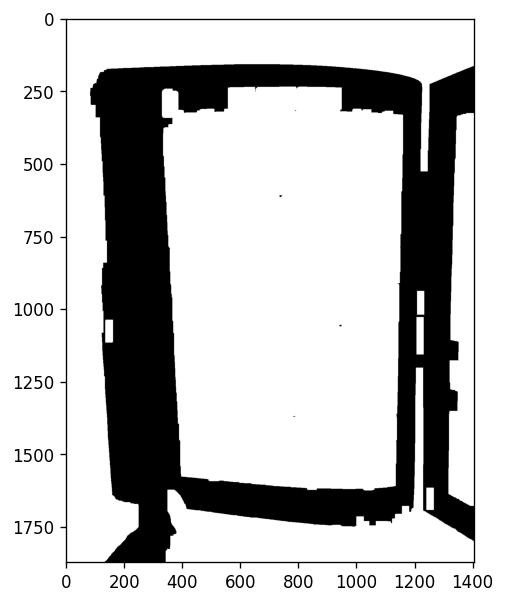

In [19]:
dilate_params = (25,75)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# don't get too caught up in the parameters, see the docs if you really want to 
#know what they mean. You should more often than not 
# end up using some version of the code below
dilate = cv2.boxFilter(thresh, 0, dilate_params, kernel, (-1, -1), False, cv2.BORDER_DEFAULT)
display_g(dilate)

As you might have noticed, there is a lot of space around the text that is unnecessary. Let's get rid of it!

First, we'll draw some rectangles to cover the edges of the original image, including the stone used to hold the book open. 

We will use white boxes because they will appear black in the threshold. 

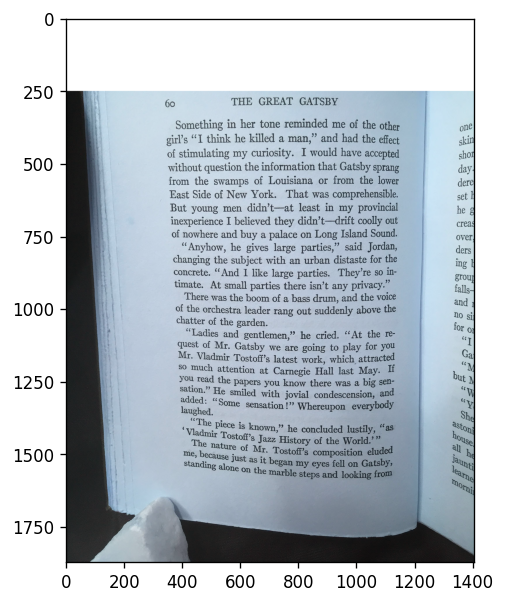

In [75]:
max_x = cvgg.shape[1]
max_y = cvgg.shape[0]
starting_point = (0,0)
ending_point = (max_x,250)
color=(255, 255, 255) # location for white in BRG scale
cv2.rectangle(cvgg, starting_point, ending_point, color, cv2.FILLED)
display(cvgg)

Same thing for the bottom. 

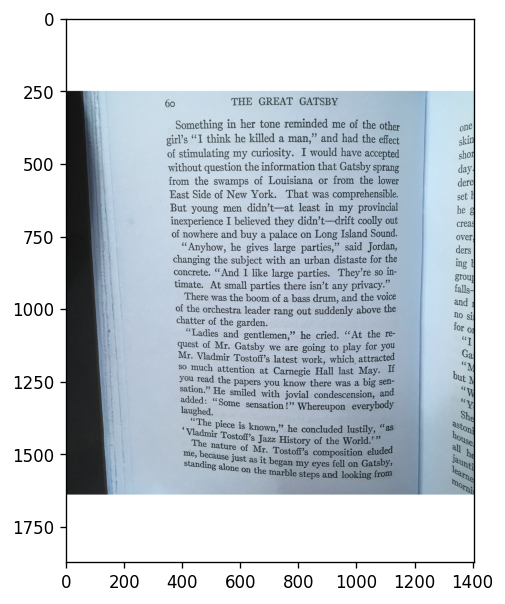

In [76]:
starting_point = (0,1640)
ending_point = (max_x,max_y)
color=(255, 255, 255)
cv2.rectangle(cvgg, starting_point, ending_point, color, cv2.FILLED)
display(cvgg)

Notice that in this way it almost acts like cropping, except the image retains its shape. cv2.rectangles is nice because you can cover pretty much any thing that might be a distraction to the OCR. Like the ads we saw in the powerpoint. All that is required is to know the coordinates of the object to cover. 

Cv2 has similar functionality with other shapes as well. 

using this image, lets run it through dilation and thresholding. 



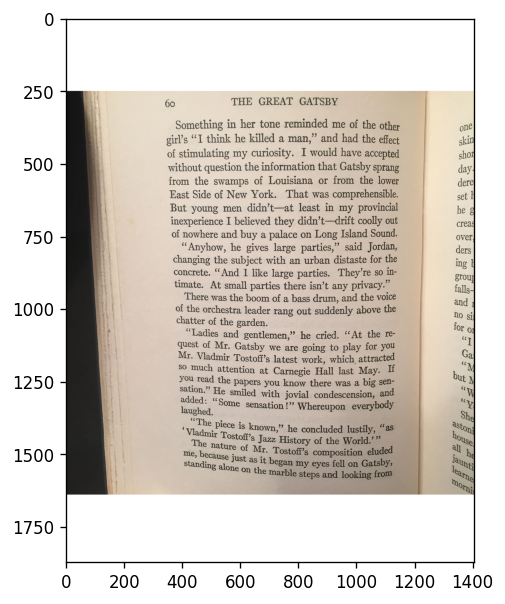

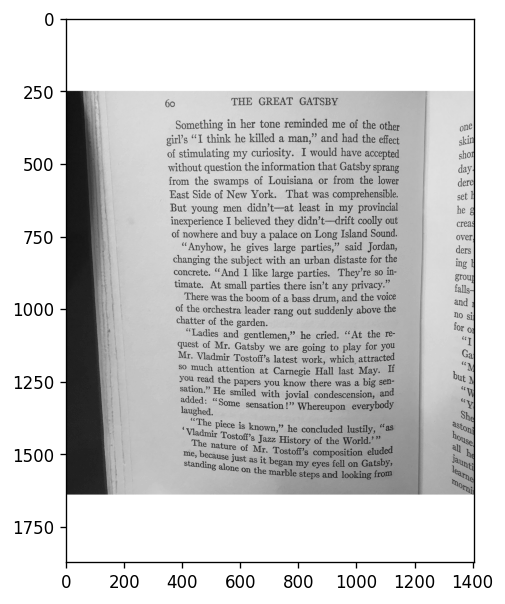

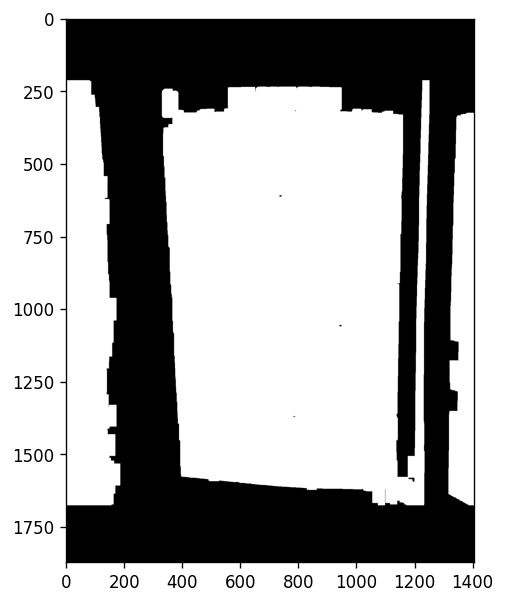

In [77]:
def process(img, dilation, blur):
  reset = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  display(reset)
  gray = cv2.cvtColor(reset, cv2.COLOR_BGR2GRAY)
  display_g(gray)
  blur = cv2.blur(gray, blur)
  thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  dilate_params = dilation

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
  dilate = cv2.boxFilter(thresh, 0, dilate_params, kernel, (-1, -1), False, cv2.BORDER_DEFAULT)
  display_g(dilate)
process(cvgg, (25,75), (1,1))

For our purposes, we could put boxes on the outside of the text to be read to get rid of the other white boxes, or since the middle box is now bigger, we could let cv2 resize the image for us. 

Unfortunately, Colab is missing a few dependencies to make this work. But it should work fine if you run it locally.

In [ ]:

#Find all contours in the image
contours = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Looping through each contour, find the largest contour (the white around the text)
largest_area = -1
largest_contour = None
for c in contours:
  x, y, w, h = cv2.boundingRect(c) # convert to coordinates
    area = int(w) * int(h)
    if area > largest_area:
        largest_contour = c
        largest_area = area
x, y, w, h = cv2.boundingRect(largest_contour)

# resize the original image
cvgg = cvgg[y:y + h, x:x + w]
display(cvgg)

# or resize the grayed, which ever is needed
gray = gray[y:y + h, x:x + w]
display(gray)

Remember that our whole purpose here is to essentially parse text so that an OCR can read it effectively. We'll cut off the edges manually for demonstration purposes, but this will already have been done if you ran the code locally. 

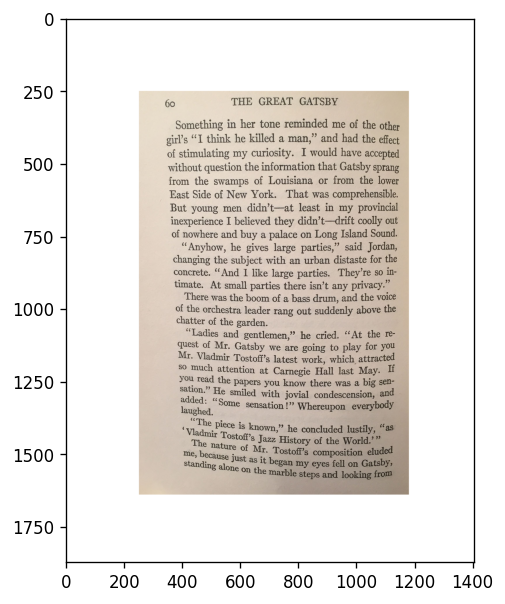

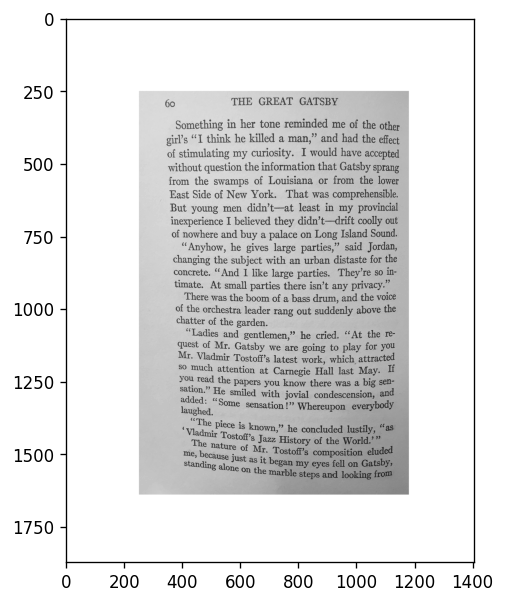

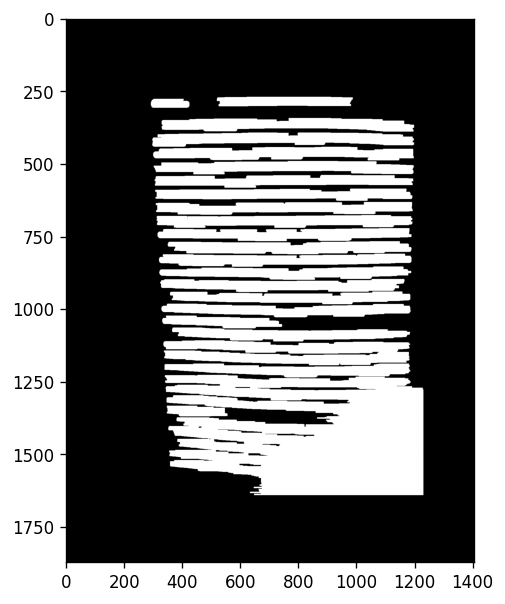

In [78]:

cv2.rectangle(cvgg, (0,max_y), (250,0), (255, 255, 255), cv2.FILLED)
cv2.rectangle(cvgg, (max_x,max_y), (1180,0), (255, 255, 255), cv2.FILLED)
process(cvgg, (100,5), (1,1))

Thresholding revealed a little shadow causing problems. This will take a little more work to resolve, so we will ignore it for this demonstration.

We can box each line using a similiar process as above. We specify line thickness and color, which can be anything we want. [This site](https://www.rapidtables.com/web/color/RGB_Color.html) has RGB decimal codes for any color. 

again, you will have to run this locally to see the output. 


In [ ]:
contours = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
return_contours = []
color = (220,20,60) #crimson RGB decimal code
line_thickness = (10)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(cvgg, (x, y), (x + w, y + h), color, line_thickness) 
    return_contours += [c]

## Rotate the image

###Special angle rotations: 90, and 180-degrees 

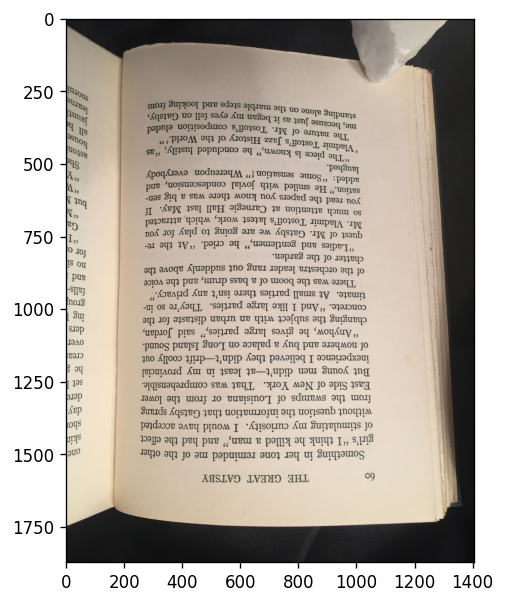

In [49]:
gg = cv2.rotate(gg, cv2.ROTATE_180)
display(gg)

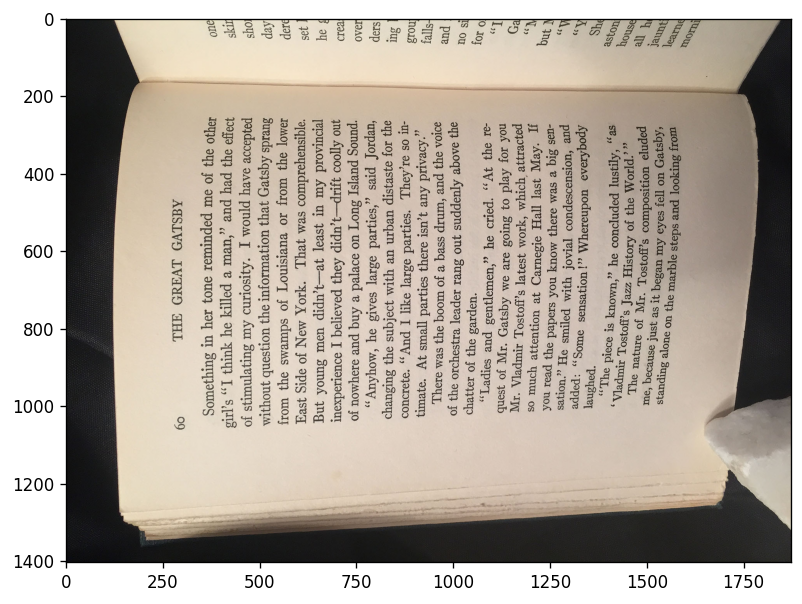

In [50]:
gg = cv2.rotate(gg, cv2.ROTATE_90_CLOCKWISE)
display(gg)

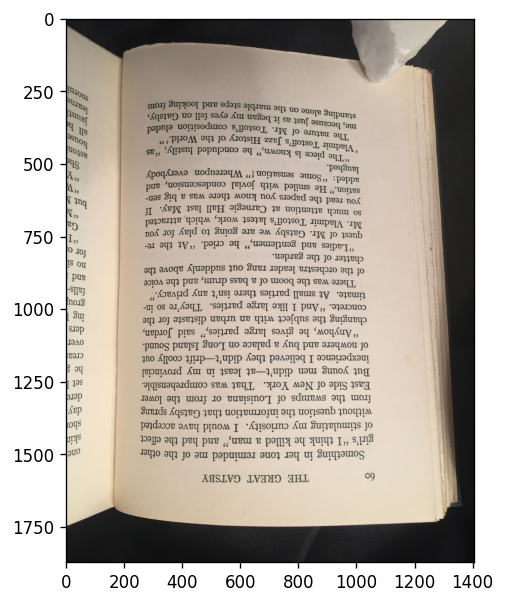

In [51]:
gg = cv2.rotate(gg, cv2.ROTATE_90_COUNTERCLOCKWISE)
display(gg)

###Rotations with any angle

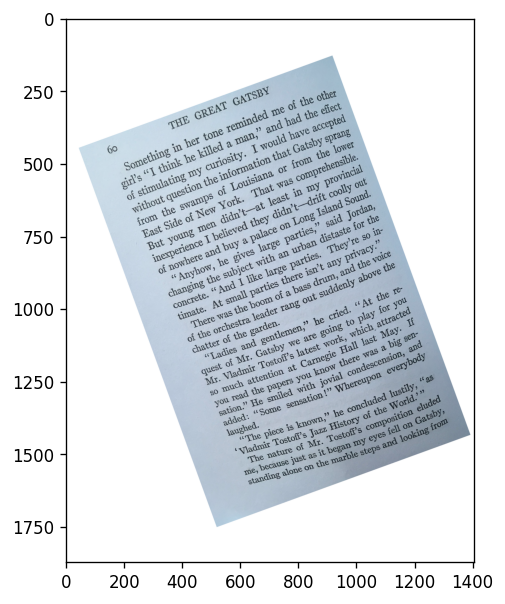

In [79]:
# first find the center of the image (center of rotation)
center = cvgg.shape[1]/2, gg.shape[0]/2

# identify the angle of rotation
angle = 20
scale = 1.0

# set the dimensions to the original.
(h, w) = gg.shape[:2]

Rotation_Matrix = cv2.getRotationMatrix2D(center, angle, scale)

cvgg = cv2.warpAffine(cvgg, Rotation_Matrix, 
                    (w,h), flags=cv2.INTER_CUBIC, borderMode = cv2.BORDER_REPLICATE)

display(cvgg)

We can actually figure out the angle automatically instead of defining it arbitrarily. It requires a bit of a process, though. 

In [ ]:
process(cvgg, (50,100), (1,1))
coords = np.column_stack(np.where(dilate > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
  angle = -(90 + angle)
elif angle > 45:
  angle = 90-angle
else:
  angle = -angle
(h, w) = cvgg.shape[:2]

Rotation_Matrix = cv2.getRotationMatrix2D(center, angle, scale)

cvgg = cv2.warpAffine(cvgg, Rotation_Matrix, 
                    (w,h), flags=cv2.INTER_CUBIC, borderMode = cv2.BORDER_REPLICATE)
display(cvgg)